In [34]:
# Importando bibliotecas

import os
import glob
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt    

np.random.seed(20)

In [35]:
# Definindo diretório

os.chdir(r"D:\Documents\Scripts\TCC\Hits\Dataset\Bases Tratadas\Spotify")

In [36]:
# Loop para pegar todos os CSV

extensao = 'csv'
arquivos = [i for i in glob.glob('*.{}'.format(extensao))]

arquivos

['FINAL_dataset-of-00s.csv',
 'FINAL_dataset-of-10s.csv',
 'FINAL_dataset-of-60s.csv',
 'FINAL_dataset-of-70s.csv',
 'FINAL_dataset-of-80s.csv',
 'FINAL_dataset-of-90s.csv']

In [37]:
# Juntando os arquivos em um só 

data = pd.concat([pd.read_csv(f) for f in arquivos ])
data.reset_index(drop=True, inplace=True)

In [38]:
# Visualizando as colunas

data.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'artist_name', 'artist_final', 'country',
       'genre'],
      dtype='object')

In [39]:
# Selecionando as colunas que servirão como parâmetro no modelo

y = data.target
x = data[['danceability', 'energy', 'key', 'loudness','mode', 'speechiness', 'acousticness', 
          'instrumentalness', 'liveness','valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit','sections']]

In [40]:
# Total de linhas

print(x.shape, y.shape)

(33056, 15) (33056,)


In [41]:
# Divisão da base em treino e teste

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=5)

### RANDOM FOREST

In [42]:
# Criando um classificador RandomForest

modelo = RandomForestClassifier(n_estimators=500, criterion='gini', random_state = 0) 
modelo = modelo.fit(x_train, y_train)

              precision    recall  f1-score   support

           0       0.83      0.72      0.77      5182
           1       0.78      0.87      0.82      5837

    accuracy                           0.80     11019
   macro avg       0.80      0.79      0.79     11019
weighted avg       0.80      0.80      0.80     11019



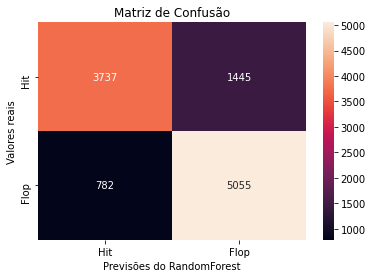

In [43]:
# Matriz de confusão

y_pred = modelo.predict(x_test)

cf_matrix = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Previsões do RandomForest');ax.set_ylabel('Valores reais'); 
ax.set_title('Matriz de Confusão'); 
ax.xaxis.set_ticklabels(['Hit', 'Flop']); ax.yaxis.set_ticklabels(['Hit', 'Flop']);

In [44]:
# Validando a importância de cada parâmetro

parametros = modelo.feature_importances_
parametros

array([0.1083704 , 0.08358086, 0.02862025, 0.07507569, 0.01015301,
       0.07248636, 0.11077488, 0.17003747, 0.05046266, 0.07033322,
       0.05094981, 0.07567286, 0.00639787, 0.04854252, 0.03854214])

In [45]:
# Classificando os parâmetros por sua importância no modelo

sorted(zip(modelo.feature_importances_, x.columns), reverse=True)

[(0.1700374700491776, 'instrumentalness'),
 (0.11077487573003265, 'acousticness'),
 (0.1083704030976634, 'danceability'),
 (0.08358085994582654, 'energy'),
 (0.07567285806480462, 'duration_ms'),
 (0.07507568782139426, 'loudness'),
 (0.0724863592480964, 'speechiness'),
 (0.07033322474719204, 'valence'),
 (0.05094981089852363, 'tempo'),
 (0.05046265870341049, 'liveness'),
 (0.0485425202772903, 'chorus_hit'),
 (0.03854214130915587, 'sections'),
 (0.028620249592750474, 'key'),
 (0.01015300956621256, 'mode'),
 (0.006397870948469031, 'time_signature')]